In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np  # linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import os
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from PIL import Image
#from imutils import paths
import random
import pickle
import cv2
import datetime
from pprint import pprint
import librosa

In [3]:
from tables import file
from pandas.core.indexes.multi import F
import pandas as pd

file1 = pd.read_csv('/content/drive/MyDrive/archive (1)/7/7.benign.csv')
file1['label'] = 'benign'
file2 = pd.read_csv('/content/drive/MyDrive/archive (1)/7/7.gafgyt.combo.csv')
file2['label'] = 'gafgyt combo'
file3 = pd.read_csv('/content/drive/MyDrive/archive (1)/7/7.gafgyt.junk.csv')
file3['label'] = 'gafgyt junk'
file4 = pd.read_csv('/content/drive/MyDrive/archive (1)/7/7.gafgyt.scan.csv')
file4['label'] = 'gafgyt scan'
file5 = pd.read_csv('/content/drive/MyDrive/archive (1)/7/7.gafgyt.tcp.csv')
file5['label'] = 'gafgyt tcp'
file6 = pd.read_csv('/content/drive/MyDrive/archive (1)/7/7.gafgyt.udp.csv')
file6['label'] = 'gafgyt udp'
#file7 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.mirai.ack.csv')
#file7['label'] = 'mirai ack'
#file8 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.mirai.scan.csv')
#file8['label'] = 'mirai scan'
##file9 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.mirai.syn.csv')
#file9['label'] = 'mirai syn'
#file10 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.mirai.udp.csv')
#file10['label'] = 'mirai udp'
#file11 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.mirai.udpplain.csv')
#file11['label'] = 'mirai udpplain'

file0 = pd.concat([file1, file2])
del file1,file2
file0 = pd.concat([file0,file3])
del file3
file0 = pd.concat([file0,file4])
del file4
file0 = pd.concat([file0,file5])
del file5
file0 = pd.concat([file0,file6])
del file6
#file0 = pd.concat([file0,file7])
#del file7
#file0 = pd.concat([file0,file8])
#del file8
#file0 = pd.concat([file0,file9])
#del file9
#file0 = pd.concat([file0,file10])
#del file10
#file0 = pd.concat([file0,file11])
#del file11


In [4]:
file0['label'].value_counts()

gafgyt udp      110617
gafgyt tcp       97783
gafgyt combo     58669
benign           52150
gafgyt junk      28305
gafgyt scan      27698
Name: label, dtype: int64

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
file0.label = le.fit_transform(file0.label)

file0

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0
1,1.000000,70.000000,0.000000,1.000000,70.000000,0.000000,1.000000,70.000000,0.000000,1.000000,...,0.0,0.0,1.000000,70.000000,0.000000,70.000000,0.000000,0.0,0.0,0
2,1.000008,89.999836,0.003289,1.000889,89.982231,0.355061,1.096162,88.245473,32.012169,1.791226,...,0.0,0.0,1.000000,90.000000,0.000000,90.000000,0.000000,0.0,0.0,0
3,1.000000,322.000000,0.000000,1.000000,322.000000,0.000000,1.000000,322.000000,0.000000,1.000000,...,0.0,0.0,11.163562,380.087760,92.127549,380.087760,8487.485312,0.0,0.0,0
4,1.784845,328.723273,35.476876,1.864710,328.435318,35.810498,1.952701,328.145333,35.978878,1.995166,...,0.0,0.0,12.158154,376.297073,89.161260,376.297073,7949.730316,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110612,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,5
110613,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,5
110614,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,5
110615,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,5


In [6]:
import numpy as np

# assume your DataFrame is named 'df'
file0 = file0.replace([np.inf, -np.inf], np.nan)  # replace infinite values with NaN
#da = da[da.abs() < np.finfo(np.float64).max]  # remove all rows containing values larger than max float

file0 = file0.dropna()

# print the new DataFrame shape to verify the infinite or too large values have been removed
print(file0.shape)

(375222, 116)


In [7]:
data = file0.iloc[:,:-1]

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(file0.iloc[:,:-1])

In [9]:
X = pd.DataFrame(scaled_features, columns = data.columns)
y = file0.iloc[:,-1]

print(X.shape)
print(y.shape)

(375222, 115)
(375222,)


In [10]:
X= X.values

In [11]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=100)
Xrus,Yrus = rus.fit_resample(X,y)

In [12]:
labels_full = pd.get_dummies(Yrus,prefix='type')
labels_full.head()

labels = labels_full.values
labels

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xrus,labels, test_size=0.2, random_state=100)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.125, random_state=100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_validate.shape)
print(y_test.shape)


(116331, 115)
(116331, 6)
(33238, 115)
(16619, 6)
(33238, 6)


In [14]:
import numpy as np
X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
x_validate_cnn = np.reshape(X_validate, (X_validate.shape[0], X_validate.shape[1],1)) 

In [15]:
import keras
from keras.utils import np_utils
from keras.regularizers import *
from keras.initializers import glorot_uniform

import keras.backend as K
K.clear_session()

from keras.models import *
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import *
from keras.callbacks import *

In [16]:
# Build Model CNN_LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation = 'relu', input_shape = (X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation = 'relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(16, return_sequences=True))  # returns a sequence of vectors of dimension 16
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

modelName = 'CNN+LSTM'
#keras.utils.plot_model(model, './'+modelName+'_Archi.png',show_shapes=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 115, 64)           384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 57, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 57, 32)            10272     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 28, 32)           0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 28, 32)            8320      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 14, 32)           0

In [17]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            learning_rate=0.00001)
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

checkpoint = ModelCheckpoint('./'+modelName+'.h5',
                            monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             save_weights_only=True,
                             verbose=1)

In [18]:
epochs = 100
batch_size = 512
history = model.fit(X_train_cnn,y_train, batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_validate_cnn,y_validate),
    callbacks=[learning_rate_reduction, checkpoint] 
)


Epoch 1/100
228/228 [==============================] - ETA: 0s - loss: 0.6261 - accuracy: 0.6727
Epoch 1: val_loss improved from inf to 0.44473, saving model to ./CNN+LSTM.h5
228/228 [==============================] - 70s 288ms/step - loss: 0.6261 - accuracy: 0.6727 - val_loss: 0.4447 - val_accuracy: 0.7373 - lr: 0.0010
Epoch 2/100
228/228 [==============================] - ETA: 0s - loss: 0.4488 - accuracy: 0.7280
Epoch 2: val_loss did not improve from 0.44473
228/228 [==============================] - 64s 279ms/step - loss: 0.4488 - accuracy: 0.7280 - val_loss: 0.4497 - val_accuracy: 0.7341 - lr: 0.0010
Epoch 3/100
228/228 [==============================] - ETA: 0s - loss: 0.5047 - accuracy: 0.7034
Epoch 3: val_loss improved from 0.44473 to 0.43460, saving model to ./CNN+LSTM.h5
228/228 [==============================] - 63s 276ms/step - loss: 0.5047 - accuracy: 0.7034 - val_loss: 0.4346 - val_accuracy: 0.7358 - lr: 0.0010
Epoch 4/100
228/228 [==============================] - ETA: 0

1039/1039 [==============================] - 13s 12ms/step


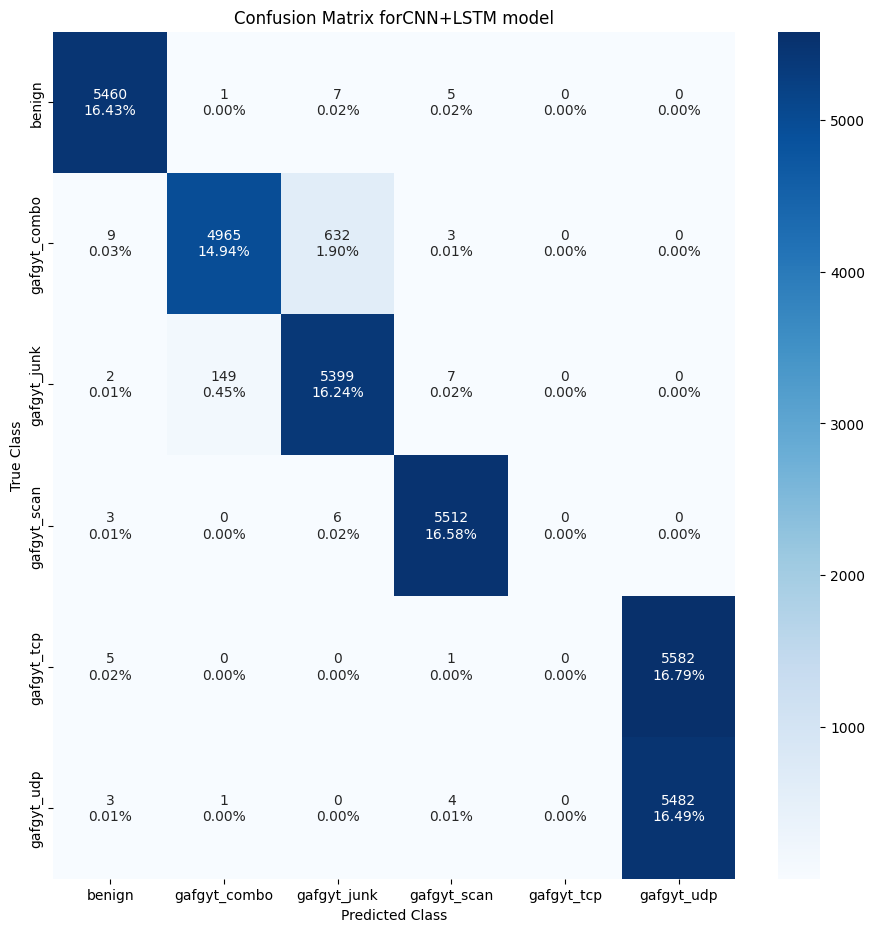

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
#model = tf.keras.models.load_model('/'+model_name+'.h5')

y_pred = model.predict(X_test_cnn)

y_pred_cm  = np.argmax(y_pred, axis =1)
y_test_cm  = np.argmax(y_test, axis = 1)

cm = confusion_matrix(y_test_cm, y_pred_cm) 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(6,6)

label = ['benign','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp']

plt.figure(figsize=(11,11))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix for'+ modelName+' model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.savefig('./'+modelName+'_CM.png')
plt.show()

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test_cm, y_pred_cm, target_names= ['benign','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp']))

loss, accuracy = model.evaluate(X_test_cnn, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

with open('./'+modelName+'_CR.txt','a') as f:
    f.write(classification_report(y_test_cm, y_pred_cm, target_names= ['benign','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp']))
    f.write("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

              precision    recall  f1-score   support

      benign       1.00      1.00      1.00      5473
gafgyt_combo       0.97      0.89      0.93      5609
 gafgyt_junk       0.89      0.97      0.93      5557
 gafgyt_scan       1.00      1.00      1.00      5521
  gafgyt_tcp       0.00      0.00      0.00      5588
  gafgyt_udp       0.50      1.00      0.66      5490

    accuracy                           0.81     33238
   macro avg       0.73      0.81      0.75     33238
weighted avg       0.72      0.81      0.75     33238

   1/1039 [..............................] - ETA: 53s - loss: 0.1248 - accuracy: 0.9062

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1039/1039 [==============================] - 12s 12ms/step - loss: 0.3071 - accuracy: 0.8068
Test: accuracy = 0.806848  ;  loss = 0.307144


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


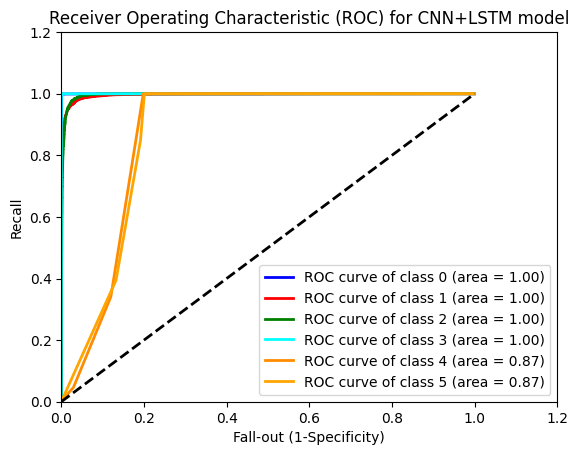

In [21]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(labels.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','aqua', 'darkorange', 'orange','fuchsia', 'lime','magenta'])
for i, color in zip(range(labels.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0,1.2])
plt.ylim([0.0,1.2])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.title('Receiver Operating Characteristic (ROC) for '+modelName+' model')
plt.legend(loc="lower right")
plt.savefig('./'+modelName+'_ROC.png')

plt.show()

In [22]:
from sklearn.metrics import precision_score
macro_score_rf = precision_score(y_test_cm,y_pred_cm,average='macro')
micro_score_rf = precision_score(y_test_cm,y_pred_cm,average='micro')
weighted_score_rf = precision_score(y_test_cm,y_pred_cm,average='weighted')

#precision scores
print(macro_score_rf)
print(micro_score_rf)
print(weighted_score_rf)

from sklearn.metrics import recall_score
rmacro_score_rf = recall_score(y_test_cm,y_pred_cm,average='macro')
rmicro_score_rf = recall_score(y_test_cm,y_pred_cm,average='micro')
rweighted_score_rf = recall_score(y_test_cm,y_pred_cm,average='weighted')

#precision scores
print(rmacro_score_rf)
print(rmicro_score_rf)
print(rweighted_score_rf)

0.7252699539818154
0.8068475840904988
0.724462544429537
0.80854821434488
0.8068475840904988
0.8068475840904988


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
